# CLEANING DATA

In [1]:
import numpy as np
import pandas as pd

## DATA IMPORT

In [2]:
df = pd.read_csv("./housing_price_ge19.csv")
print(f'Shape of Data is : {df.shape[0]} rows and {df.shape[1]} columns')

Shape of Data is : 1728 rows and 17 columns


In [3]:
# drop number column because it is id
df.drop(columns=['Number'], inplace=True)

df.describe()

,Price,Lot_Size,Waterfront,Age,Land_Value,New_Construct,Central_Air,Living_Area,Pct_College,Bedrooms,Fireplaces,Bathrooms,Rooms
count,1728.000000,1728.000000,1728.000000,1648.000000,1647.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1330.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,0.008681,27.956311,34324.905889,0.046875,0.367477,1754.975694,55.567708,3.154514,0.603008,1.900174,7.041667
std,98441.391015,0.698680,0.092791,29.208179,35075.035326,0.211432,0.482257,619.935553,10.333581,0.817351,0.551616,0.658352,2.316453
min,5000.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,0.000000,13.000000,15100.000000,0.000000,0.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,0.000000,19.000000,25000.000000,0.000000,0.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,0.000000,34.000000,39650.000000,0.000000,1.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,1.000000,225.000000,412600.000000,1.000000,1.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


## CLEANING NA

In [4]:
for column in df.columns:
    if df[column].isnull().any():
        print(f"{column} has null value")

Age has null value
Land_Value has null value
Heat_Type has null value
Sewer_Type has null value
Fireplaces has null value


In [5]:
print(f"Heat_Type 's values are {df.Heat_Type.unique()}")
print(f"Sewer_Type 's values are {df.Sewer_Type.unique()}")

Heat_Type 's values are ['Electric' 'Hot_Water' nan 'Hot_Air']
Sewer_Type 's values are ['Private' 'Public' nan]


In [6]:
df_after_clean = df.drop(df[(df.Age.isnull()) | (df.Land_Value.isnull()) | (df.Heat_Type.isnull()) |
                            (df.Sewer_Type.isnull()) | (df.Fireplaces.isnull())].index)

In [7]:
if not df_after_clean.isnull().values.any():
    print("Data has been cleaned, no null values in dataframe")
    
for column in df_after_clean.columns:
    if df_after_clean[column].isnull().any():
        print(f"{column} has null value")

Data has been cleaned, no null values in dataframe


In [8]:
df_after_clean.describe()

,Price,Lot_Size,Waterfront,Age,Land_Value,New_Construct,Central_Air,Living_Area,Pct_College,Bedrooms,Fireplaces,Bathrooms,Rooms
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,211038.323024,0.482990,0.007732,27.884021,34506.932990,0.047251,0.377148,1755.481100,55.531787,3.152062,0.602234,1.904639,7.059278
std,96653.500930,0.666151,0.087629,28.899109,35104.443513,0.212266,0.484881,619.210411,10.364626,0.823184,0.552361,0.652342,2.309074
min,5000.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,640.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,0.000000,13.000000,15100.000000,0.000000,0.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,188047.500000,0.360000,0.000000,19.000000,25000.000000,0.000000,0.000000,1633.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,257500.000000,0.530000,0.000000,33.000000,40000.000000,0.000000,1.000000,2147.000000,64.000000,4.000000,1.000000,2.500000,9.000000
max,775000.000000,12.200000,1.000000,201.000000,412600.000000,1.000000,1.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


## ENCODING NON-NUMBER VALUES

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode the categorical and ordinal variables
df_after_clean['Heat_Type'] = label_encoder.fit_transform(df_after_clean['Heat_Type'])
df_after_clean['Sewer_Type'] = label_encoder.fit_transform(df_after_clean['Sewer_Type'])
df_after_clean['Fuel_Type'] = label_encoder.fit_transform(df_after_clean['Fuel_Type'])

## DISTRIBUTION OF FEATURES

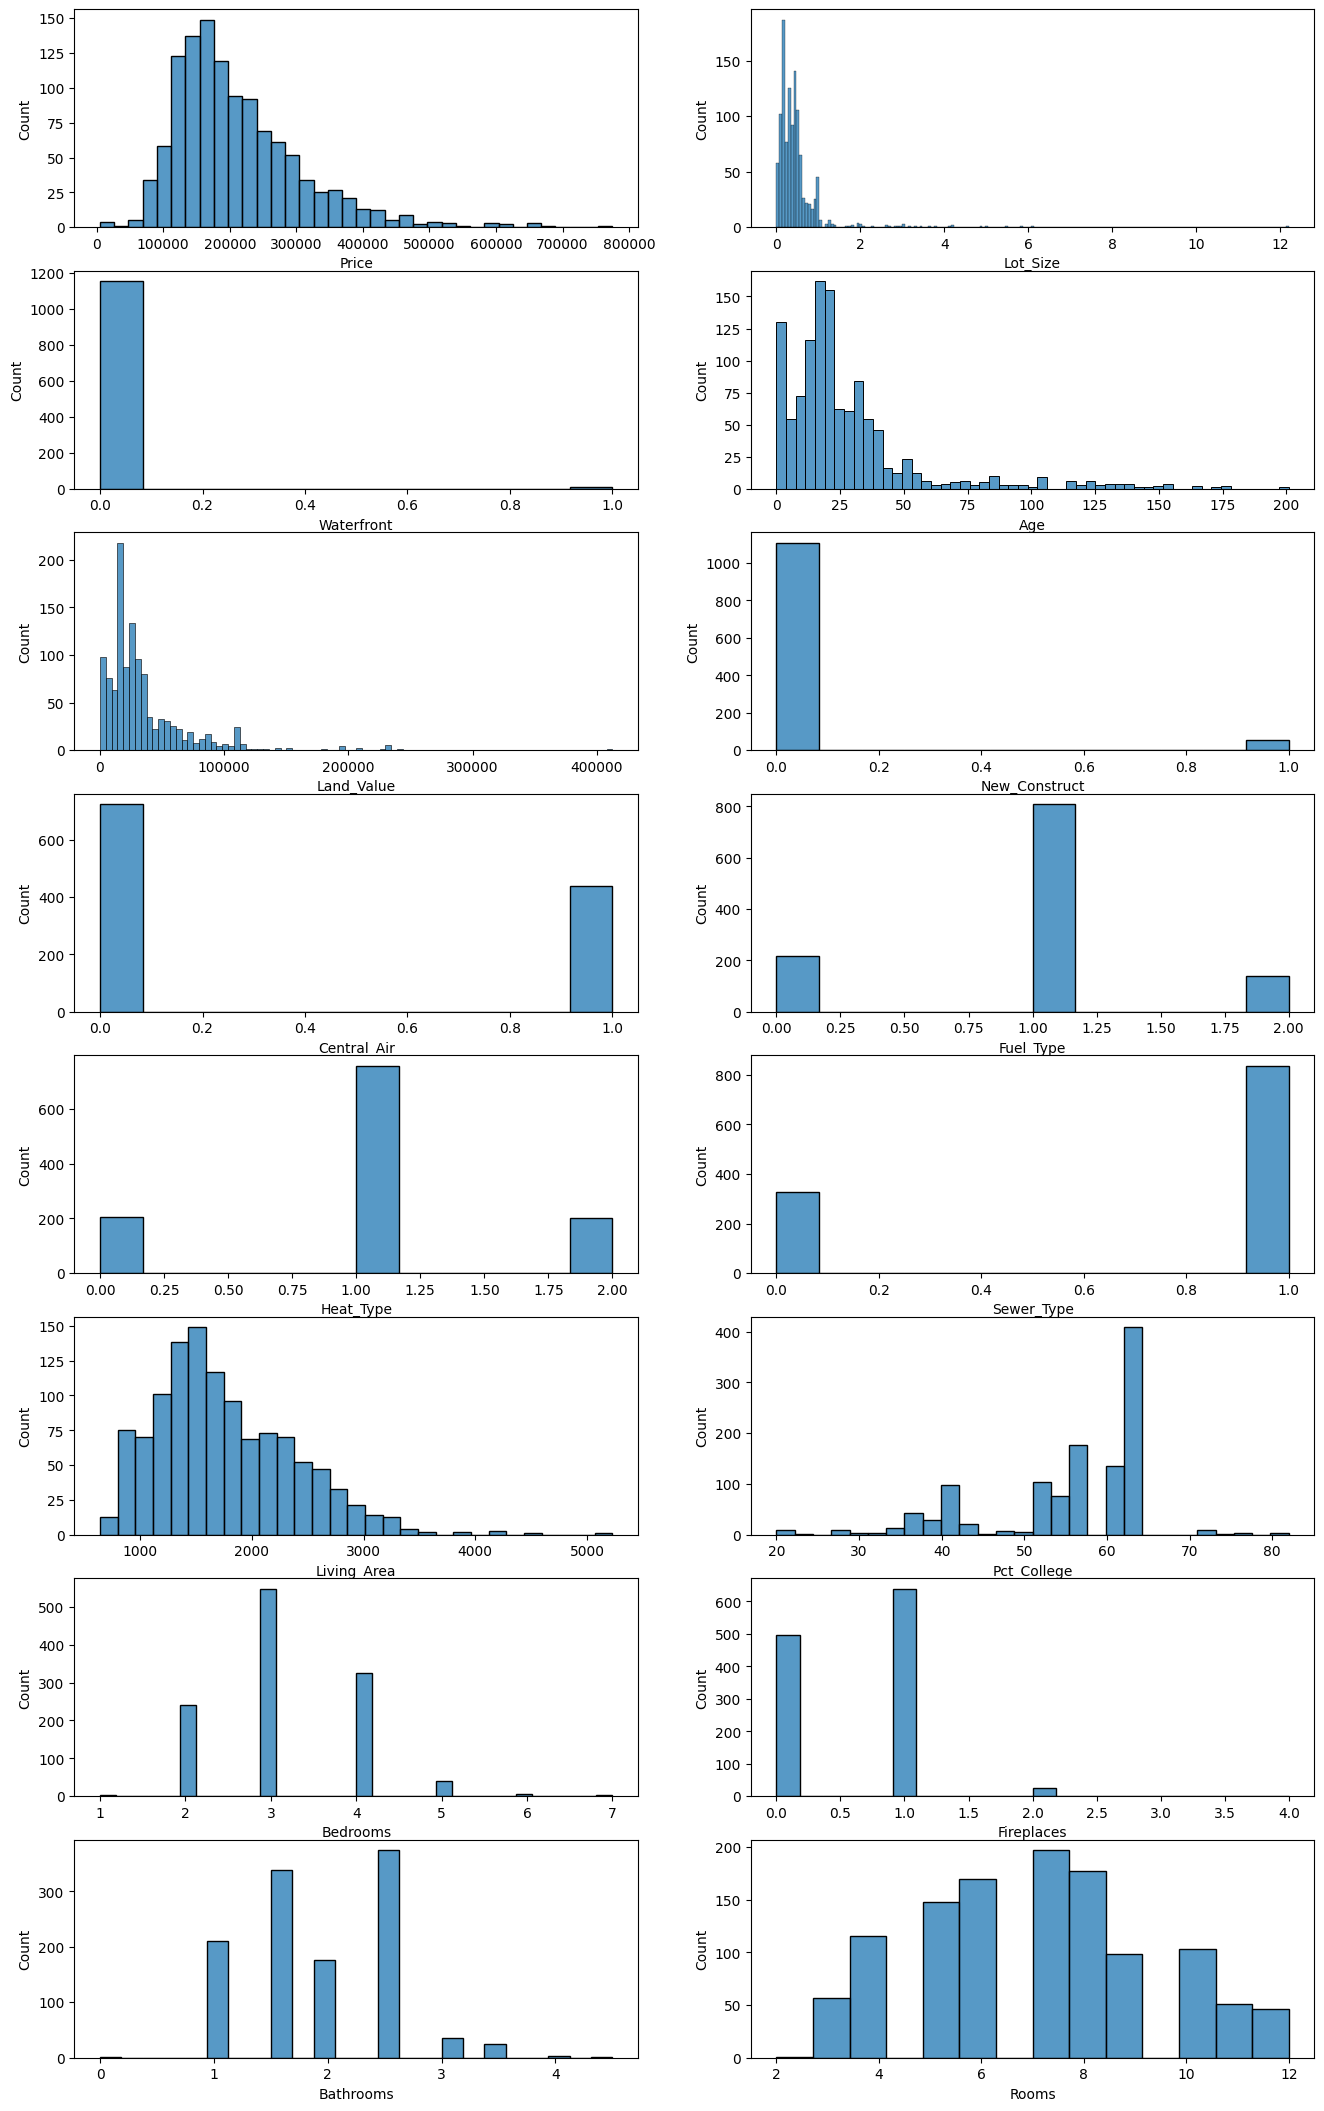

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

pos = 1
fig = plt.figure(figsize=(16,30))
for i in df_after_clean.columns:
    ax = fig.add_subplot(9,2,pos)
    pos = pos + 1
    sns.histplot(df_after_clean[i],ax=ax)

## CORRELATION MATRIX OF DATA AFTER CLEAN

<Axes: >

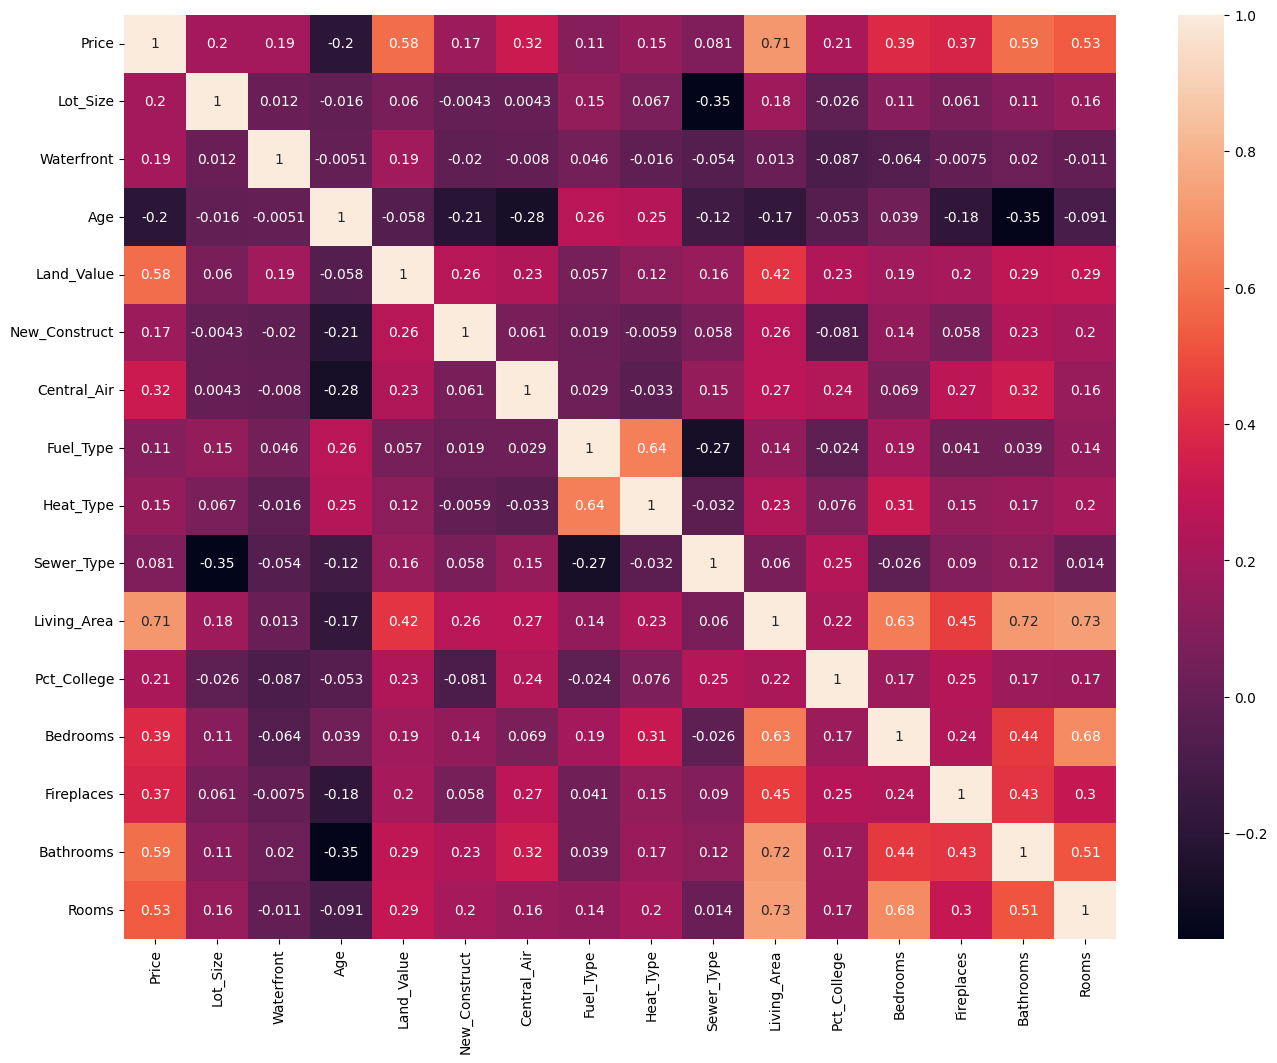

In [11]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_after_clean.corr(),annot=True)

##### Analizing: for price, we can see that living are is the most significant. Next are rooms, bathrooms and land value. For this, I think it is quite acceptable except for Bedrooms 
 
##### Action: I drop more outliners and Waterfront, Age, New_Construct, Sewer_Type, Pct_College. I think these properties is not significant

## DROP IRRELEVANT PROPERTIES

In [12]:
droplist = ["Waterfront","Age", "New_Construct", "Sewer_Type", "Pct_College"]

df_after_clean.drop(columns=droplist, inplace=True)

## DROP OUTLINERS

In [13]:
for col in df_after_clean.columns:
    q_low = df_after_clean[col].quantile(.1)
    q_hi  = df_after_clean[col].quantile(.9)
    df_after_clean_twice = df_after_clean[(df_after_clean[col] < q_hi) & (df_after_clean[col] > q_low)]
    
df_after_clean_twice.reset_index(inplace=True)
print(f'Shape of Data is : {df_after_clean_twice.shape[0]} rows and {df_after_clean_twice.shape[1]} columns')

Shape of Data is : 790 rows and 12 columns


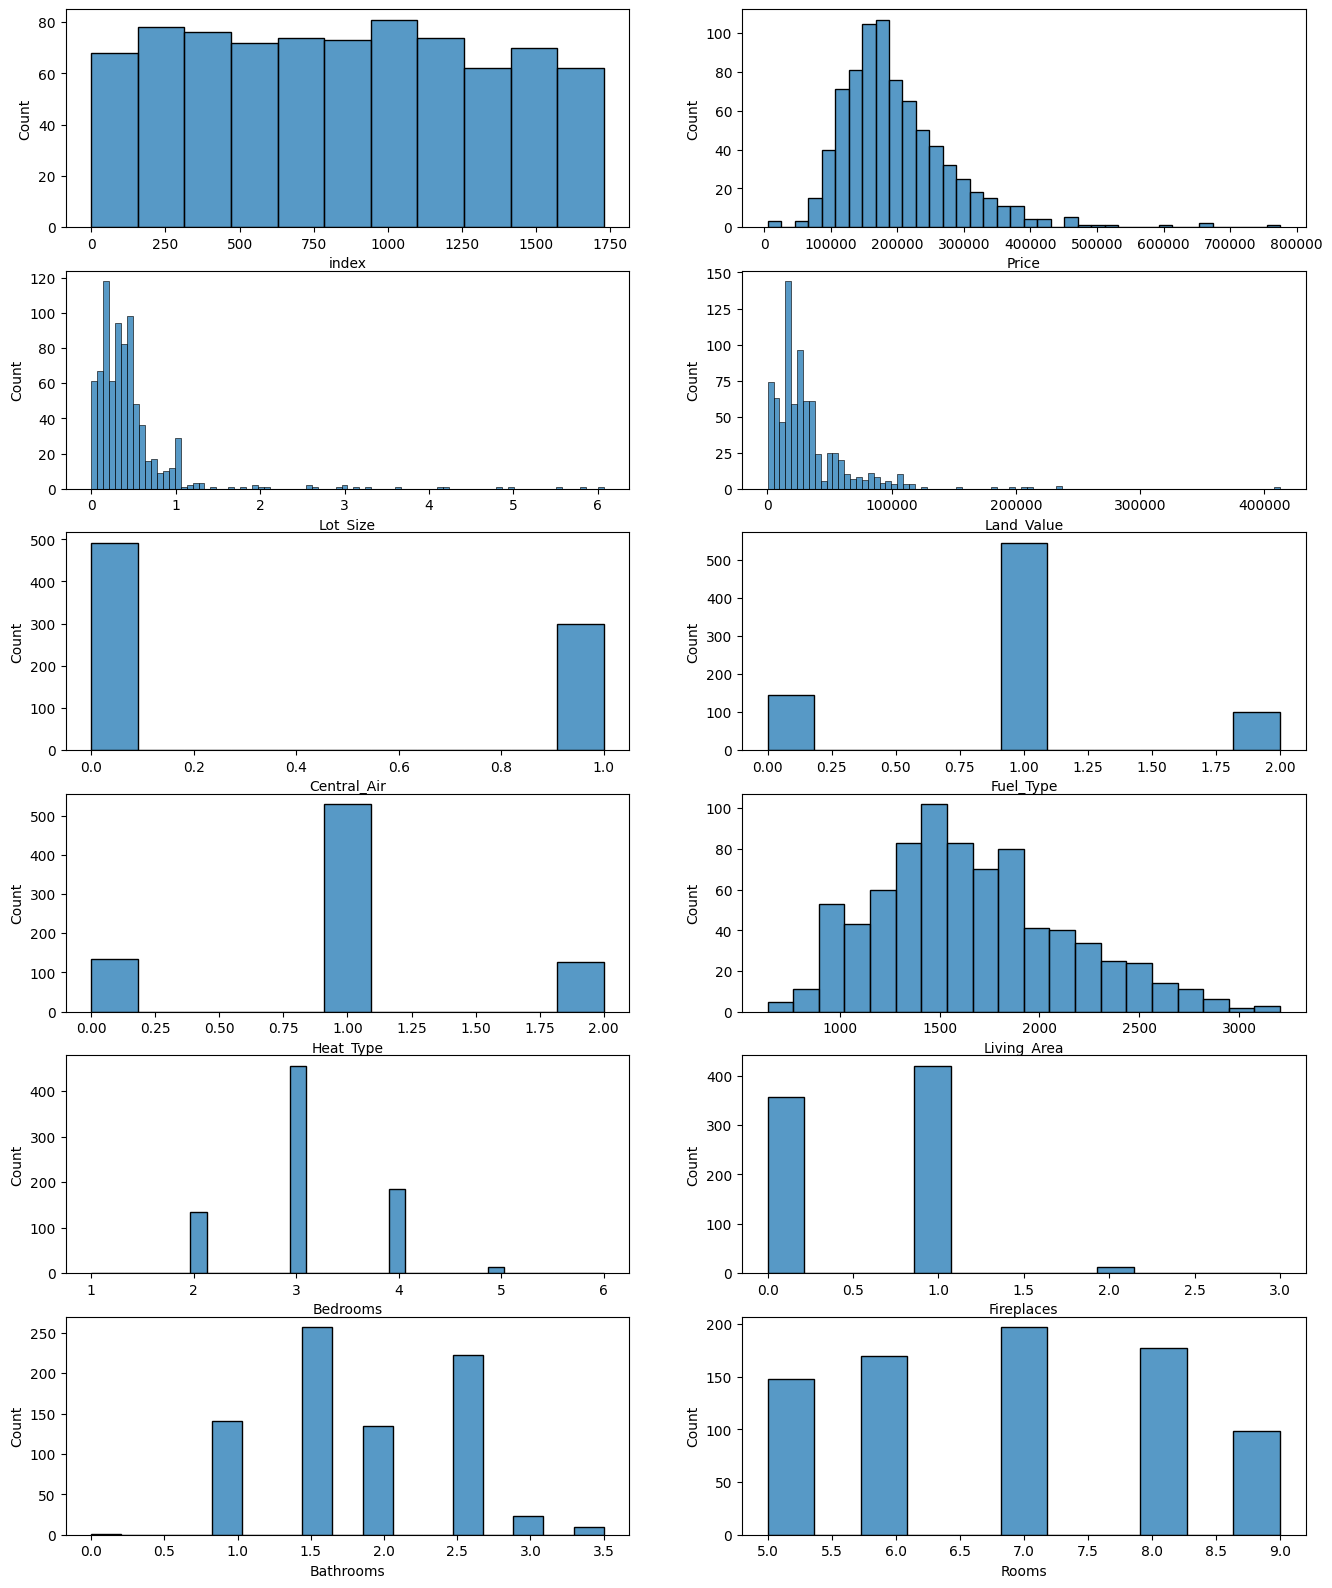

In [14]:
pos = 1
fig = plt.figure(figsize=(16,30))
for i in df_after_clean_twice.columns:
    ax = fig.add_subplot(9,2,pos)
    pos = pos + 1
    sns.histplot(df_after_clean_twice[i],ax=ax)

# MODEL BUILDING

In [15]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
# lets get the VIF value to understand the multi collinearity
vifdf = []
for i in df_after_clean_twice.columns:
    X = np.array(df_after_clean_twice.drop(i,axis=1))
    y = np.array(df_after_clean_twice[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
2,Lot_Size,1.114701
0,index,1.196560
4,Central_Air,1.220674
9,Fireplaces,1.251734
11,Rooms,1.352024
8,Bedrooms,1.542518
3,Land_Value,1.602120
5,Fuel_Type,1.762645
6,Heat_Type,1.802638
10,Bathrooms,2.039948


In [17]:
# data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_for_price = StandardScaler()
df_std_price = df_after_clean_twice[["Price"]]
df_std = df_after_clean_twice[["Lot_Size", "Land_Value", "Living_Area"]]
no_std_df = df_after_clean_twice.loc[:, ~df_after_clean_twice.columns.isin(["Lot_Size", "Land_Value", "Price", "Living_Area"])]
scaled_data = scaler.fit_transform(df_std)
scaled_price = scaler_for_price.fit_transform(df_std_price)
scaled_df = pd.DataFrame(scaled_data, index=df_std.index, columns=df_std.columns)
scaled_price_df = pd.DataFrame(scaled_price, index=df_std_price.index, columns=df_std_price.columns)
last_df = pd.concat([scaled_df, no_std_df, scaled_price_df], axis=1)
last_df.reset_index(inplace=True, drop=True)

In [18]:
if not last_df.isnull().values.any():
    print("Data has been cleaned, no null values in dataframe")
    
for column in last_df.columns:
    if last_df[column].isnull().any():
        print(f"{column} has null value")

Data has been cleaned, no null values in dataframe


In [19]:
# Lets look at the descriptive stats now
last_df.describe()

,Lot_Size,Land_Value,Living_Area,index,Central_Air,Fuel_Type,Heat_Type,Bedrooms,Fireplaces,Bathrooms,Rooms,Price
count,7.900000e+02,7.900000e+02,7.900000e+02,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,7.900000e+02
mean,8.994212e-18,-6.295948e-17,2.068669e-16,843.808861,0.377215,0.944304,0.988608,3.096203,0.568354,1.845570,6.882278,8.994212e-17
std,1.000634e+00,1.000634e+00,1.000634e+00,492.216142,0.484997,0.553305,0.575038,0.690960,0.534973,0.607994,1.293472,1.000634e+00
min,-7.767511e-01,-9.802402e-01,-2.142818e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,-2.301494e+00
25%,-4.919169e-01,-5.196961e-01,-7.075753e-01,419.250000,0.000000,1.000000,1.000000,3.000000,0.000000,1.500000,6.000000,-6.376696e-01
50%,-1.903278e-01,-2.253517e-01,-1.379007e-01,842.500000,0.000000,1.000000,1.000000,3.000000,1.000000,1.500000,7.000000,-2.217134e-01
75%,6.099651e-02,1.629654e-01,5.655052e-01,1245.250000,1.000000,1.000000,1.000000,3.750000,1.000000,2.500000,8.000000,4.910573e-01
max,9.393504e+00,1.183112e+01,3.256981e+00,1727.000000,1.000000,2.000000,2.000000,6.000000,3.000000,3.500000,9.000000,6.849542e+00


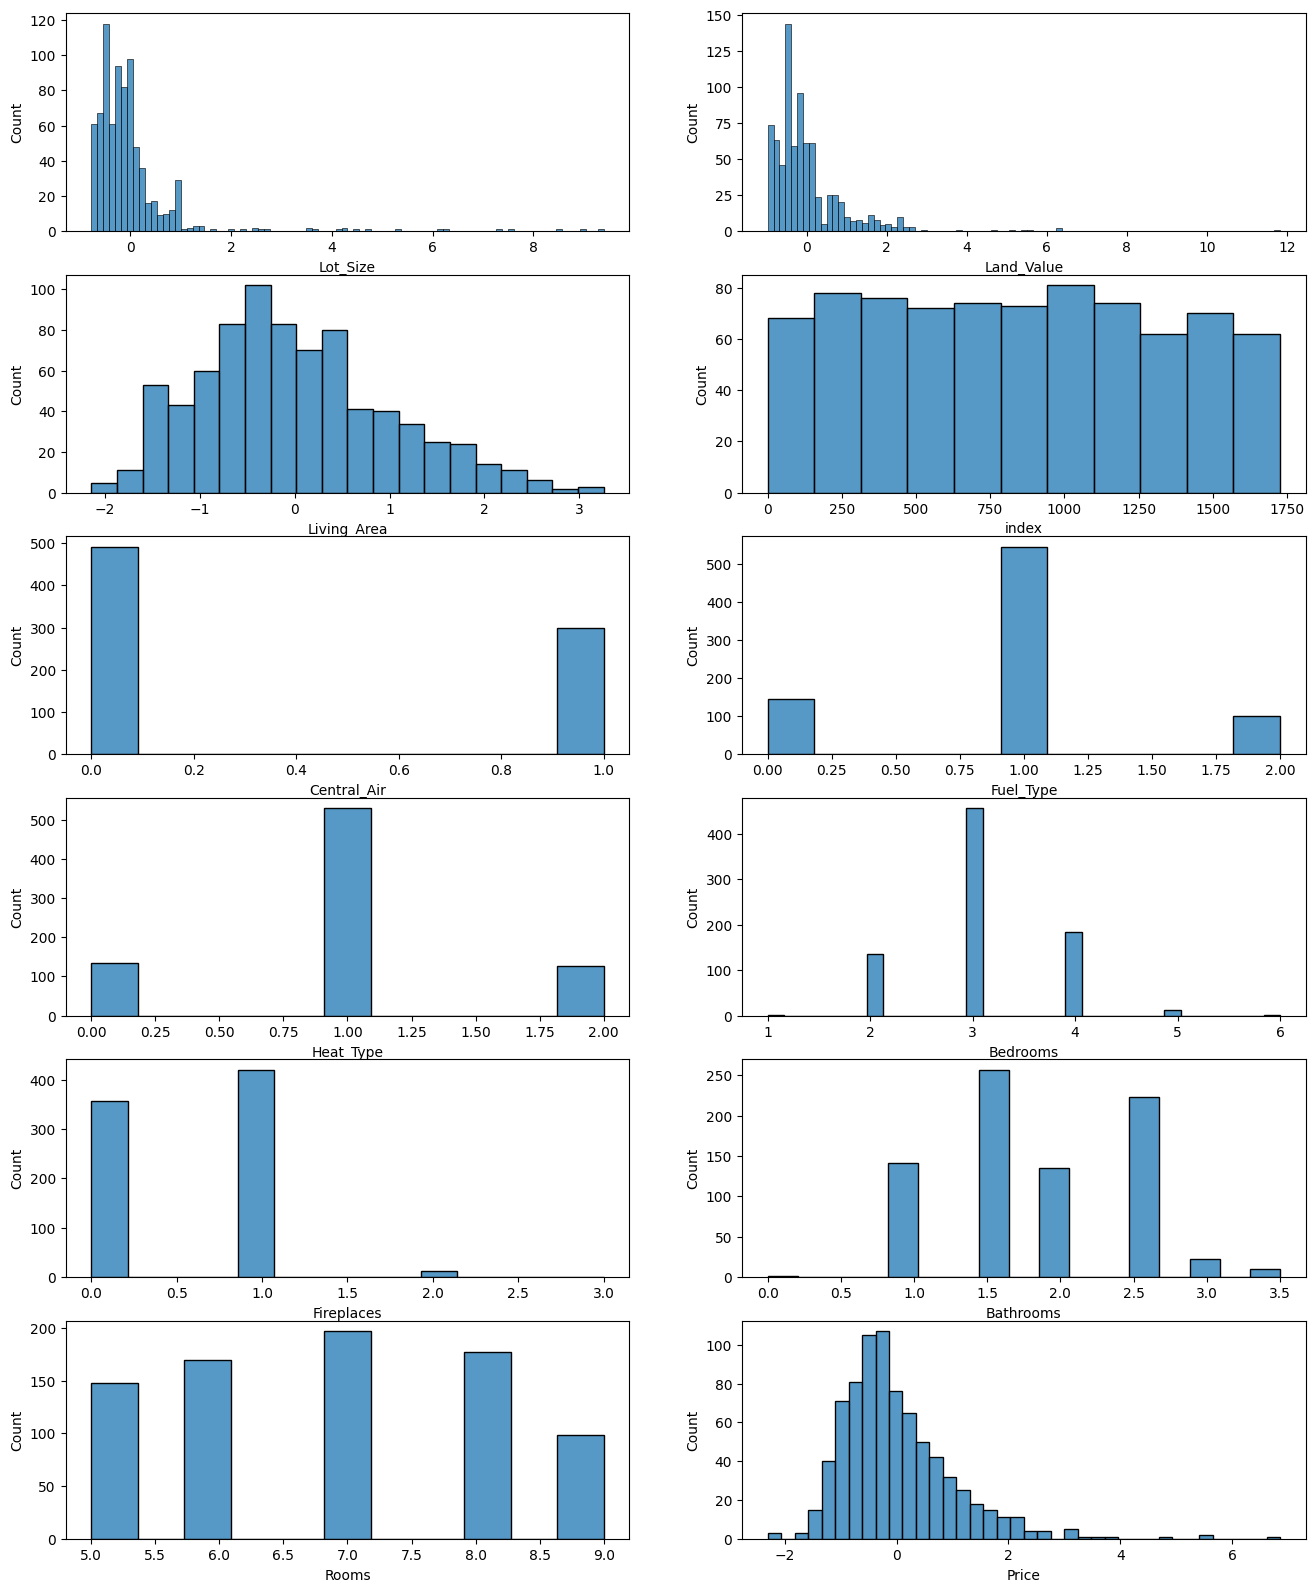

In [20]:
pos = 1
fig = plt.figure(figsize=(16,30))
for i in last_df.columns:
    ax = fig.add_subplot(9,2,pos)
    pos = pos + 1
    sns.histplot(last_df[i],ax=ax)

## PCA

In [21]:
# import libraries for PCA
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=10)
X = last_df.drop(['Price', 'index'], axis=1)
X_pca = pca.fit_transform(X)
df_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
df_std_pca['Price'] = last_df['Price']

<Axes: >

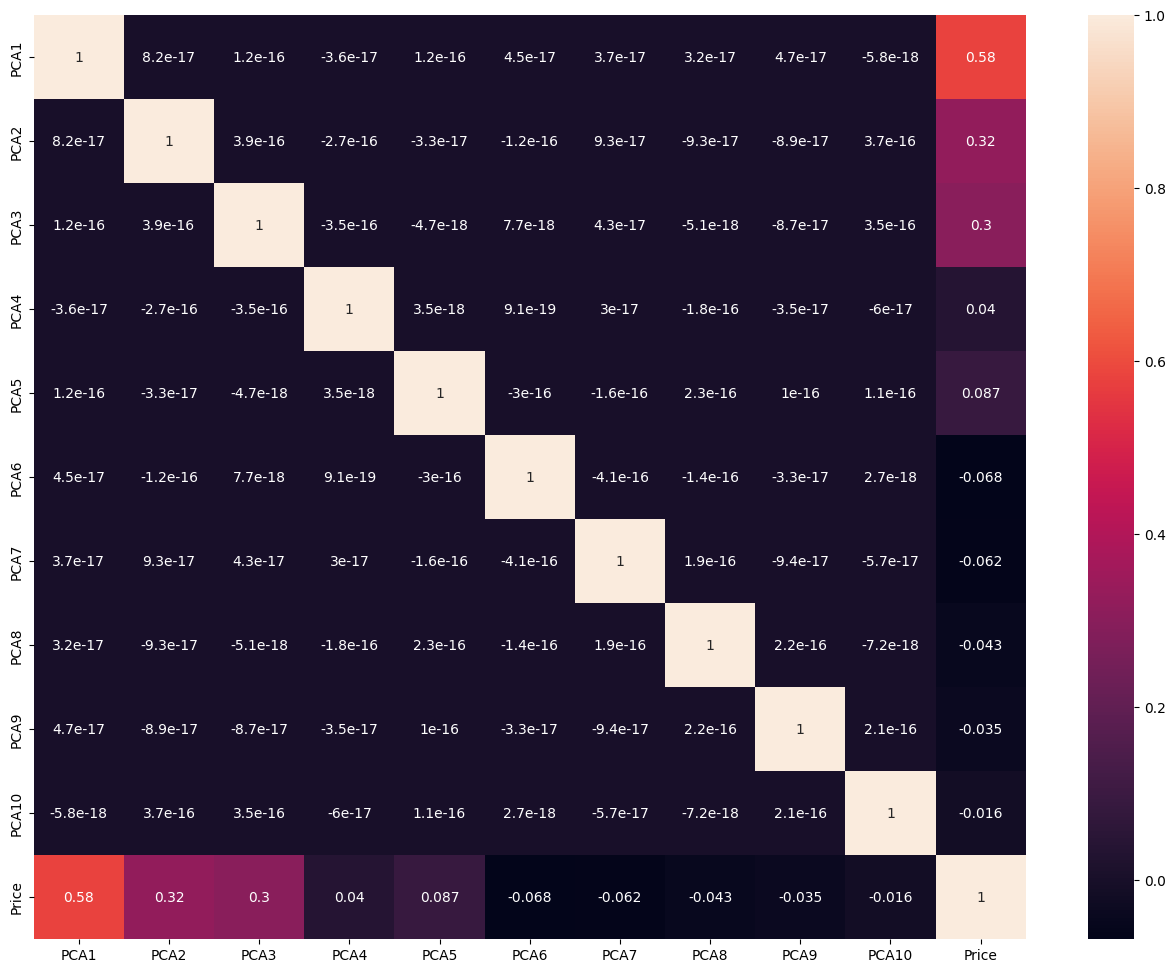

In [23]:
# check the correlation matrix after applying PCA

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_std_pca.corr(),annot=True)

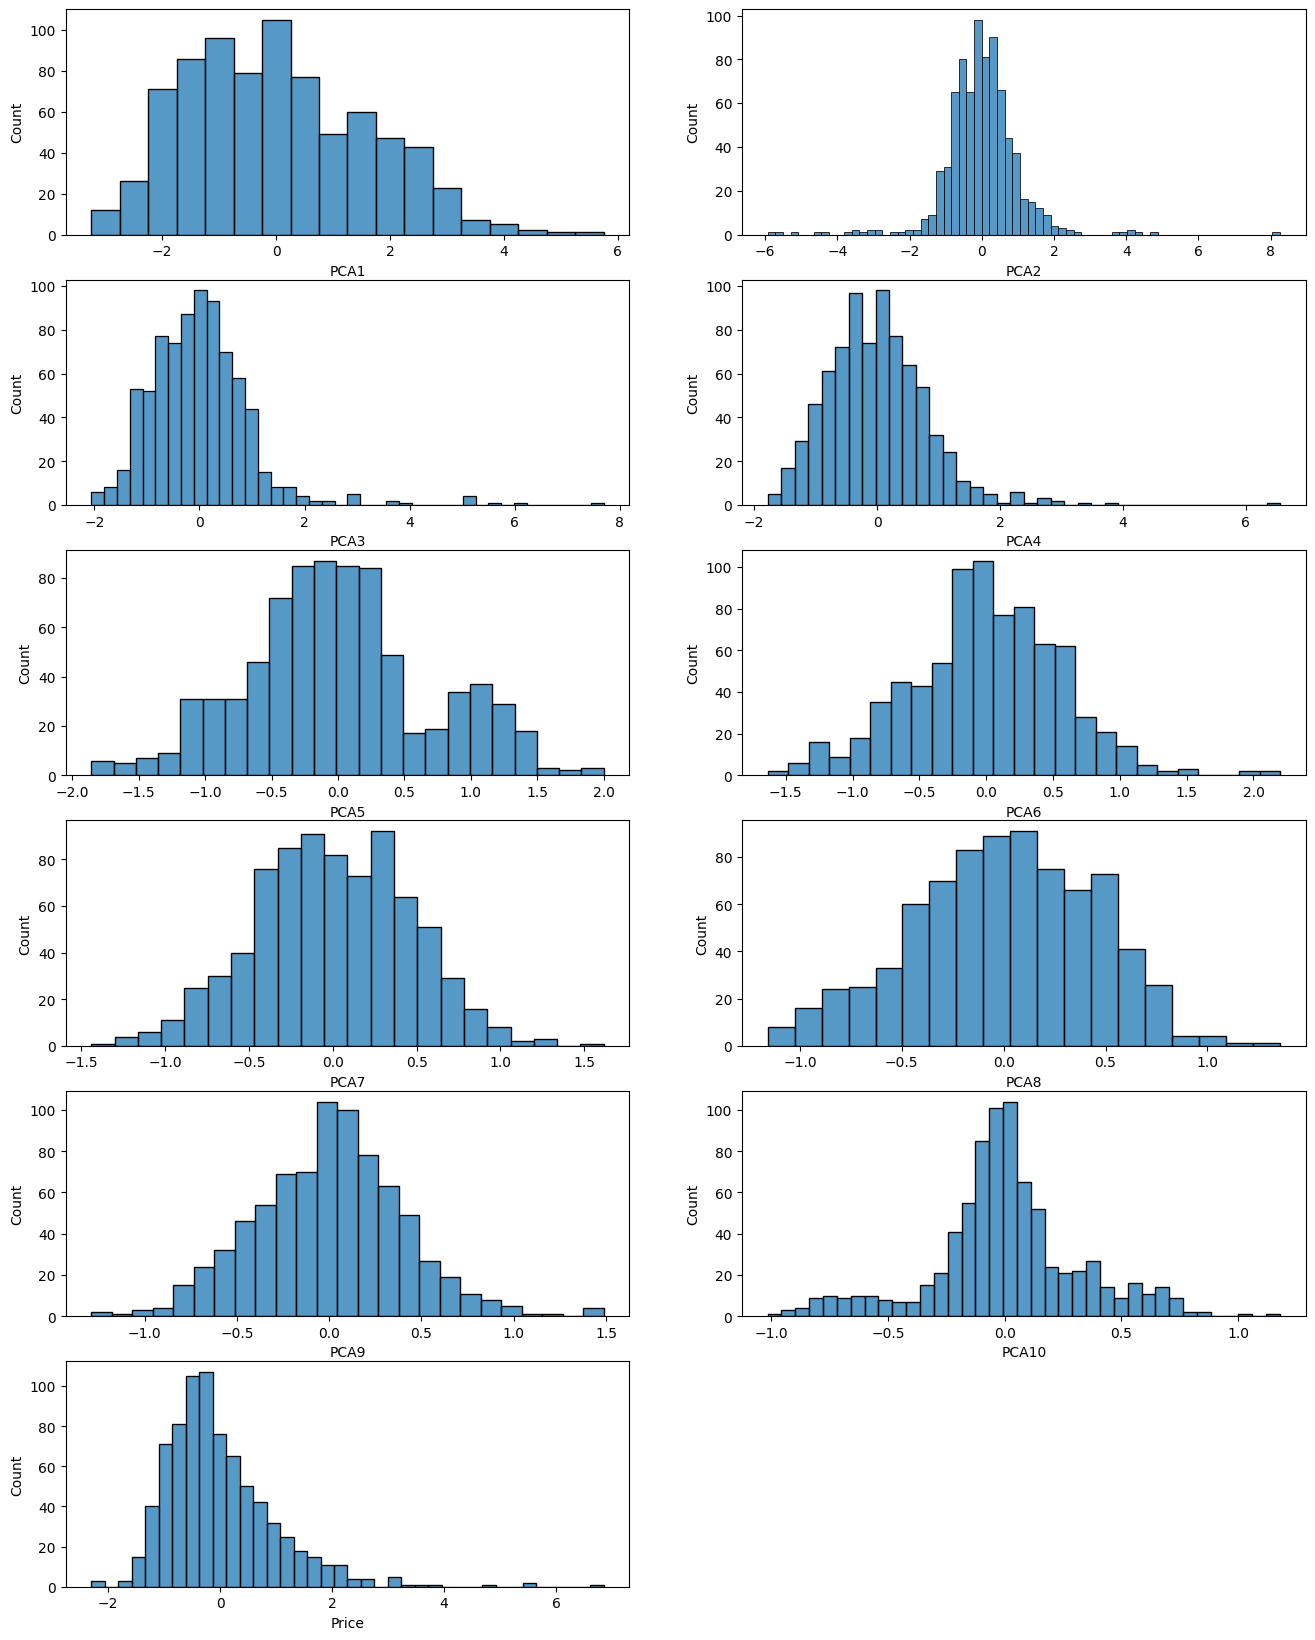

In [24]:
# check the distribution of features after applying PCA

pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.histplot(df_std_pca[i],ax=ax)

## Regression

In [25]:
# import libraires needed to perform our Regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [26]:
# Split data into Training and testing
X = np.array(df_std_pca.drop('Price', axis=1))
y = np.array(df_std_pca['Price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
for i in [X_train,X_test,y_train,y_test]:
    print("Shape of Data is {}".format(i.shape))

Shape of Data is (632, 10)
Shape of Data is (158, 10)
Shape of Data is (632,)
Shape of Data is (158,)


In [27]:
# Lets train our model on training data and predict on test data to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.3616669202049748 | Root Mean Square Error is : 0.8571558267289234


## FIRST 30 VALUES VISUALIZATION

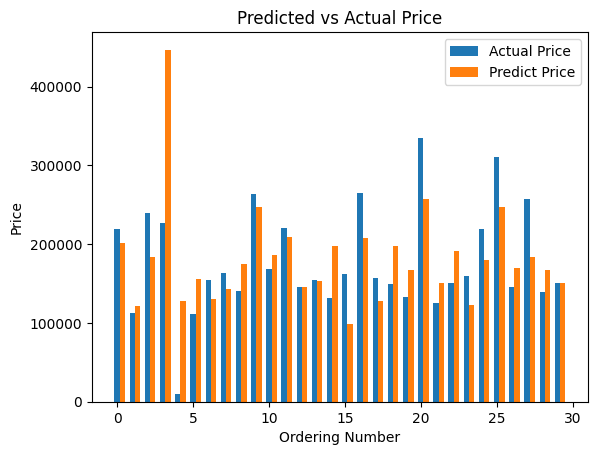

In [28]:
import matplotlib.pyplot as plt

df_y_test = pd.DataFrame(y_test , columns=['Price'])
df_y_pred = pd.DataFrame(y_pred, columns=['Price'])

y_test_original = scaler_for_price.inverse_transform(df_y_test[['Price']])
y_pred_original = scaler_for_price.inverse_transform(df_y_pred[['Price']])
y_test_original = y_test_original.reshape(1, -1)[0]
y_pred_original = y_pred_original.reshape(1, -1)[0]
y_test_draw = y_test_original[0:30]
y_pred_draw = y_pred_original[0:30]


x_values = np.arange(len(y_test_draw))
bar_width = 0.35
fig, ax = plt.subplots()
ax.bar(x_values, y_test_draw, width=bar_width, label='Actual Price')
ax.bar(np.arange(len(x_values)) + bar_width, y_pred_draw, width=bar_width, label='Predict Price')

# Add axis labels and a title
plt.xlabel('Ordering Number')
plt.ylabel('Price')
plt.title('Predicted vs Actual Price')
ax.legend()

# Show the plot
plt.show()